In [39]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

nba_df = pd.read_csv('../Databases/raw_data.csv')
nba_df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,2.5938,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,3.9148,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,3.7550,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,5.5812,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,2.1990,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,12839,Joel Embiid,PHI,29,213.36,127.005760,Kansas,Cameroon,2014,1,...,33.1,10.2,4.2,10.3740,0.057,0.243,0.370,0.655,0.233,2022-23
12840,12840,John Butler Jr.,POR,20,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,...,2.4,0.9,0.6,3.8004,0.012,0.065,0.102,0.411,0.066,2022-23
12841,12841,John Collins,ATL,25,205.74,102.511792,Wake Forest,USA,2017,1,...,13.1,6.5,1.2,6.1936,0.035,0.180,0.168,0.593,0.052,2022-23
12842,12842,Jericho Sims,NYK,24,208.28,113.398000,Texas,USA,2021,2,...,3.4,4.7,0.5,2.5348,0.117,0.175,0.074,0.780,0.044,2022-23


In [40]:
not_usa = nba_df.iloc[:, 7] == 'USA'
nba_df = nba_df.loc[not_usa]
nba_df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,2.5938,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,3.9148,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,3.7550,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,5.5812,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,2.1990,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12838,12838,Joe Wieskamp,TOR,23,198.12,92.986360,Iowa,USA,2021,2,...,1.0,0.4,0.3,1.9630,0.000,0.068,0.115,0.321,0.083,2022-23
12840,12840,John Butler Jr.,POR,20,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,...,2.4,0.9,0.6,3.8004,0.012,0.065,0.102,0.411,0.066,2022-23
12841,12841,John Collins,ATL,25,205.74,102.511792,Wake Forest,USA,2017,1,...,13.1,6.5,1.2,6.1936,0.035,0.180,0.168,0.593,0.052,2022-23
12842,12842,Jericho Sims,NYK,24,208.28,113.398000,Texas,USA,2021,2,...,3.4,4.7,0.5,2.5348,0.117,0.175,0.074,0.780,0.044,2022-23


In [41]:
nba_df = nba_df.drop(nba_df.columns[:12], axis = 1)
nba_df = nba_df.drop(nba_df.columns[4:6], axis = 1)
nba_df = nba_df.drop(nba_df.columns[-3:], axis = 1)
nba_df

,pts,reb,ast,net_rating,usg_pct
0,3.9,1.5,2.4,2.5938,0.169
1,3.8,1.3,0.3,3.9148,0.174
2,8.3,6.4,1.9,3.7550,0.175
3,10.2,2.8,1.7,5.5812,0.206
4,2.8,1.7,0.3,2.1990,0.195
...,...,...,...,...,...
12838,1.0,0.4,0.3,1.9630,0.115
12840,2.4,0.9,0.6,3.8004,0.102
12841,13.1,6.5,1.2,6.1936,0.168
12842,3.4,4.7,0.5,2.5348,0.074


In [42]:
nba_df.head(0)

,pts,reb,ast,net_rating,usg_pct


In [43]:
missing_values = nba_df.isnull().sum()
missing_values

pts           0
reb           0
ast           0
net_rating    0
usg_pct       0
dtype: int64

In [44]:
print(max(nba_df['pts']))
print(min(nba_df['pts']))
print(max(nba_df['ast']))
print(min(nba_df['ast']))
print(max(nba_df['reb']))
print(min(nba_df['reb']))
print(max(nba_df['usg_pct']))
print(min(nba_df['usg_pct']))

36.1
0.0
11.7
0.0
16.3
0.0
1.0
0.0


In [45]:
nba_df = nba_df.iloc[:, [0, 1, 2, 4, 3]]
nba_df.describe()

,pts,reb,ast,usg_pct,net_rating
count,10721.000000,10721.000000,10721.000000,10721.000000,10721.000000
mean,8.200392,3.440575,1.847719,0.184798,4.340032
std,6.046752,2.392808,1.813861,0.053896,1.995526
min,0.000000,0.000000,0.000000,0.000000,0.238400
25%,3.600000,1.700000,0.600000,0.149000,2.879400
50%,6.700000,2.900000,1.200000,0.181000,4.045200
75%,11.500000,4.600000,2.500000,0.218000,5.558200
max,36.100000,16.300000,11.700000,1.000000,12.282600


In [46]:
nba_df_outlier = nba_df[['pts', 'reb', 'ast', 'usg_pct', 'net_rating']] #Lo deje porque tuve un pedo hace rato, pero borrar los nombres no debería de ser un problema.
nba_df_outlier = nba_df_outlier.reset_index()
nba_df_outlier

,index,pts,reb,ast,usg_pct,net_rating
0,0,3.9,1.5,2.4,0.169,2.5938
1,1,3.8,1.3,0.3,0.174,3.9148
2,2,8.3,6.4,1.9,0.175,3.7550
3,3,10.2,2.8,1.7,0.206,5.5812
4,4,2.8,1.7,0.3,0.195,2.1990
...,...,...,...,...,...,...
10716,12838,1.0,0.4,0.3,0.115,1.9630
10717,12840,2.4,0.9,0.6,0.102,3.8004
10718,12841,13.1,6.5,1.2,0.168,6.1936
10719,12842,3.4,4.7,0.5,0.074,2.5348


In [47]:
q1_p, q2_p, q3_p = nba_df_outlier['pts'].quantile([0.25, 0.50, 0.75])
print('Q1: ', q1_p, '\nQ2: ', q2_p, '\nQ3: ', q3_p)
iqr_p = q3_p - q1_p
print('Interquartil range: ',iqr_p)
upper_limit_p = q3_p + 1.5 * iqr_p
lower_limit_p = q1_p - 1.5 * iqr_p
print('upper limit: ', upper_limit_p, '\nlower_limit: ', lower_limit_p)

Q1:  3.6 
Q2:  6.7 
Q3:  11.5
Interquartil range:  7.9
upper limit:  23.35 
lower_limit:  -8.250000000000002


In [48]:
nba_df_outlier.query('(pts < @lower_limit_p) or (pts > @upper_limit_p)')

,index,pts,reb,ast,usg_pct,net_rating
7,7,26.8,4.0,2.0,0.272,9.4144
204,206,26.2,12.5,3.1,0.314,9.8228
311,318,24.2,4.6,6.3,0.271,7.8742
359,367,27.4,9.9,4.5,0.325,10.2250
376,384,29.6,5.9,4.3,0.331,8.4262
...,...,...,...,...,...,...
10629,12733,28.9,8.3,6.8,0.322,9.8644
10664,12774,24.0,3.5,6.2,0.266,6.9932
10670,12781,26.2,5.9,8.1,0.338,10.7076
10703,12822,26.6,6.9,3.5,0.307,7.6614


<Axes: xlabel='pts'>

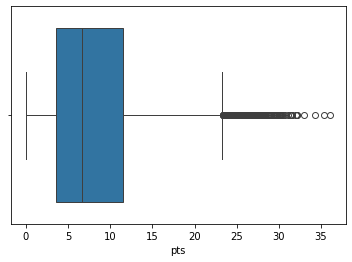

In [49]:
sns.boxplot(x='pts', data=nba_df_outlier)

In [50]:
q1_r, q2_r, q3_r = nba_df_outlier['reb'].quantile([0.25, 0.50, 0.75])
print('Q1: ', q1_r, '\nQ2: ', q2_r, '\nQ3: ', q3_r)
iqr_r = q3_r - q1_r
print('Interquartil range: ', iqr_r)
upper_limit_r = q3_r + 1.5 * iqr_r
lower_limit_r = q1_r - 1.5 * iqr_r
print('upper limit: ', upper_limit_r, '\nlower_limit: ', lower_limit_r)

Q1:  1.7 
Q2:  2.9 
Q3:  4.6
Interquartil range:  2.8999999999999995
upper limit:  8.95 
lower_limit:  -2.6499999999999995


In [51]:
nba_df_outlier.query('(reb < @lower_limit_r) or (reb > @upper_limit_r)')

,index,pts,reb,ast,usg_pct,net_rating
9,9,21.4,9.0,7.3,0.283,9.1966
39,40,7.1,11.1,0.9,0.114,4.6428
48,49,12.6,9.0,2.4,0.161,5.4322
91,92,13.4,13.5,1.2,0.209,8.6618
103,104,20.1,10.3,4.6,0.244,8.0488
...,...,...,...,...,...,...
10512,12577,14.1,9.6,1.5,0.211,7.8822
10517,12585,25.9,12.5,2.6,0.277,8.4554
10578,12669,7.0,9.3,2.5,0.104,5.3808
10588,12682,25.1,10.0,4.1,0.288,8.6976


<Axes: xlabel='reb'>

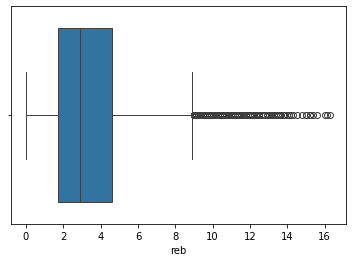

In [52]:
sns.boxplot(x='reb', data=nba_df_outlier)

In [53]:
q1_a, q2_a, q3_a = nba_df_outlier['ast'].quantile([0.25, 0.50, 0.75])
print('Q1: ', q1_a, '\nQ2: ', q2_a, '\nQ3: ', q3_a)
iqr_a = q3_a - q1_a
print('Interquartil range: ',iqr_a)
upper_limit_a = q3_a + 1.5 * iqr_a
lower_limit_a = q1_a - 1.5 * iqr_a
print('upper limit: ', upper_limit_a, '\nlower_limit: ', lower_limit_a)

Q1:  0.6 
Q2:  1.2 
Q3:  2.5
Interquartil range:  1.9
upper limit:  5.35 
lower_limit:  -2.2499999999999996


In [54]:
nba_df_outlier.query('(ast < @lower_limit_a) or (ast > @upper_limit_a)')

,index,pts,reb,ast,usg_pct,net_rating
9,9,21.4,9.0,7.3,0.283,9.1966
12,12,9.5,2.8,6.3,0.177,6.7554
21,22,21.8,4.6,7.1,0.264,8.1528
65,66,14.4,2.8,10.5,0.186,8.5772
89,90,10.9,4.5,9.0,0.170,7.9140
...,...,...,...,...,...,...
10642,12751,19.3,5.1,7.4,0.244,8.8088
10650,12760,21.0,6.1,10.7,0.247,7.8094
10664,12774,24.0,3.5,6.2,0.266,6.9932
10670,12781,26.2,5.9,8.1,0.338,10.7076


<Axes: xlabel='ast'>

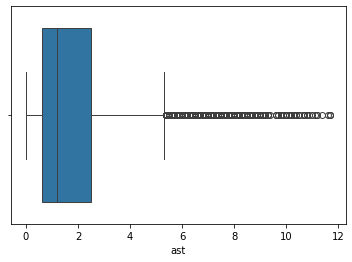

In [55]:
sns.boxplot(x='ast', data=nba_df_outlier)

In [56]:
q1_u, q2_u, q3_u = nba_df_outlier['usg_pct'].quantile([0.25, 0.50, 0.75])
print('Q1: ', q1_u, '\nQ2: ', q2_u, '\nQ3: ', q3_u)
iqr_u = q3_u - q1_u
print('Interquartil range: ',iqr_u)
upper_limit_u = q3_u + 1.5 * iqr_u
lower_limit_u = q1_u - 1.5 *iqr_u
print('upper limit: ', upper_limit_u, '\nlower_limit: ', lower_limit_u)

Q1:  0.149 
Q2:  0.181 
Q3:  0.218
Interquartil range:  0.069
upper limit:  0.3215 
lower_limit:  0.045499999999999985


In [57]:
nba_df_outlier.query('(usg_pct < @lower_limit_u) or (usg_pct > @upper_limit_u)')

,index,pts,reb,ast,usg_pct,net_rating
126,127,0.0,0.0,0.0,0.000,0.8000
138,139,0.3,1.1,0.3,0.025,2.1450
177,179,17.7,8.5,1.3,0.334,5.7668
359,367,27.4,9.9,4.5,0.325,10.2250
370,378,1.5,1.5,1.0,0.341,1.0682
...,...,...,...,...,...,...
10431,12469,0.0,0.0,0.0,0.000,0.8000
10447,12488,2.0,1.0,0.0,0.385,3.6770
10503,12564,32.2,4.8,7.3,0.331,10.9262
10629,12733,28.9,8.3,6.8,0.322,9.8644


<Axes: xlabel='usg_pct'>

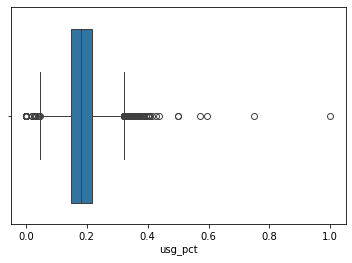

In [58]:
sns.boxplot(x='usg_pct', data=nba_df_outlier)

In [59]:
q1_n, q2_n, q3_n = nba_df_outlier['net_rating'].quantile([0.25, 0.50, 0.75])
print('Q1: ', q1_n, '\nQ2: ', q2_n, '\nQ3: ', q3_n)
iqr_n = q3_n - q1_n
print('Interquartil range: ', iqr_n)
upper_limit_n = q3_n + 1.5 * iqr_n
lower_limit_n = q1_n - 1.5 * iqr_n
print('upper limit: ', upper_limit_n, '\nlower_limit: ', lower_limit_n)

Q1:  2.8794 
Q2:  4.0452 
Q3:  5.5582
Interquartil range:  2.6788000000000003
upper limit:  9.5764 
lower_limit:  -1.1388000000000003


In [60]:
nba_df_outlier.query('(net_rating < @lower_limit_n) or (net_rating > @upper_limit_n)')

,index,pts,reb,ast,usg_pct,net_rating
137,138,19.2,13.5,4.7,0.230,10.5260
204,206,26.2,12.5,3.1,0.314,9.8228
359,367,27.4,9.9,4.5,0.325,10.2250
419,428,23.5,4.1,7.5,0.284,10.0768
945,972,21.7,4.9,8.7,0.269,9.7138
...,...,...,...,...,...,...
10625,12728,23.3,6.4,8.4,0.289,10.0778
10629,12733,28.9,8.3,6.8,0.322,9.8644
10670,12781,26.2,5.9,8.1,0.338,10.7076
10706,12825,30.1,8.8,4.6,0.319,10.7638


<Axes: xlabel='net_rating'>

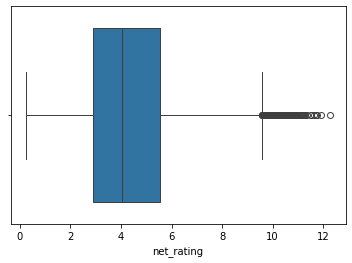

In [61]:
sns.boxplot(x='net_rating', data=nba_df_outlier)

**OUTLIERS ELIMINATION**

In [62]:
nba_no_outlier = nba_df_outlier[(nba_df_outlier['pts'] >= lower_limit_p) & (nba_df_outlier['pts'] <= upper_limit_p)]
nba_no_outlier

,index,pts,reb,ast,usg_pct,net_rating
0,0,3.9,1.5,2.4,0.169,2.5938
1,1,3.8,1.3,0.3,0.174,3.9148
2,2,8.3,6.4,1.9,0.175,3.7550
3,3,10.2,2.8,1.7,0.206,5.5812
4,4,2.8,1.7,0.3,0.195,2.1990
...,...,...,...,...,...,...
10716,12838,1.0,0.4,0.3,0.115,1.9630
10717,12840,2.4,0.9,0.6,0.102,3.8004
10718,12841,13.1,6.5,1.2,0.168,6.1936
10719,12842,3.4,4.7,0.5,0.074,2.5348


In [63]:
nba_no_outlier = nba_no_outlier[(nba_no_outlier['ast'] >= lower_limit_a) & (nba_no_outlier['ast'] <= upper_limit_a)]
nba_no_outlier

,index,pts,reb,ast,usg_pct,net_rating
0,0,3.9,1.5,2.4,0.169,2.5938
1,1,3.8,1.3,0.3,0.174,3.9148
2,2,8.3,6.4,1.9,0.175,3.7550
3,3,10.2,2.8,1.7,0.206,5.5812
4,4,2.8,1.7,0.3,0.195,2.1990
...,...,...,...,...,...,...
10716,12838,1.0,0.4,0.3,0.115,1.9630
10717,12840,2.4,0.9,0.6,0.102,3.8004
10718,12841,13.1,6.5,1.2,0.168,6.1936
10719,12842,3.4,4.7,0.5,0.074,2.5348


In [64]:
nba_no_outlier = nba_no_outlier[(nba_no_outlier['reb'] >= lower_limit_r) & (nba_no_outlier['reb'] <= upper_limit_r)]
nba_no_outlier

,index,pts,reb,ast,usg_pct,net_rating
0,0,3.9,1.5,2.4,0.169,2.5938
1,1,3.8,1.3,0.3,0.174,3.9148
2,2,8.3,6.4,1.9,0.175,3.7550
3,3,10.2,2.8,1.7,0.206,5.5812
4,4,2.8,1.7,0.3,0.195,2.1990
...,...,...,...,...,...,...
10716,12838,1.0,0.4,0.3,0.115,1.9630
10717,12840,2.4,0.9,0.6,0.102,3.8004
10718,12841,13.1,6.5,1.2,0.168,6.1936
10719,12842,3.4,4.7,0.5,0.074,2.5348


In [65]:
nba_no_outlier = nba_no_outlier[(nba_no_outlier['usg_pct'] >= lower_limit_u) & (nba_no_outlier['usg_pct'] <= upper_limit_u)]
nba_no_outlier

,index,pts,reb,ast,usg_pct,net_rating
0,0,3.9,1.5,2.4,0.169,2.5938
1,1,3.8,1.3,0.3,0.174,3.9148
2,2,8.3,6.4,1.9,0.175,3.7550
3,3,10.2,2.8,1.7,0.206,5.5812
4,4,2.8,1.7,0.3,0.195,2.1990
...,...,...,...,...,...,...
10716,12838,1.0,0.4,0.3,0.115,1.9630
10717,12840,2.4,0.9,0.6,0.102,3.8004
10718,12841,13.1,6.5,1.2,0.168,6.1936
10719,12842,3.4,4.7,0.5,0.074,2.5348


In [66]:
nba_no_outlier = nba_no_outlier[(nba_no_outlier['net_rating'] >= lower_limit_n) & (nba_no_outlier['net_rating'] <= upper_limit_n)]
nba_no_outlier

,index,pts,reb,ast,usg_pct,net_rating
0,0,3.9,1.5,2.4,0.169,2.5938
1,1,3.8,1.3,0.3,0.174,3.9148
2,2,8.3,6.4,1.9,0.175,3.7550
3,3,10.2,2.8,1.7,0.206,5.5812
4,4,2.8,1.7,0.3,0.195,2.1990
...,...,...,...,...,...,...
10716,12838,1.0,0.4,0.3,0.115,1.9630
10717,12840,2.4,0.9,0.6,0.102,3.8004
10718,12841,13.1,6.5,1.2,0.168,6.1936
10719,12842,3.4,4.7,0.5,0.074,2.5348


In [67]:
missing_values = nba_no_outlier.isnull().sum()
missing_values

index         0
pts           0
reb           0
ast           0
usg_pct       0
net_rating    0
dtype: int64

In [68]:
nba_no_outlier = nba_no_outlier.drop(nba_no_outlier[['index']], axis = 1)
nba_no_outlier

,pts,reb,ast,usg_pct,net_rating
0,3.9,1.5,2.4,0.169,2.5938
1,3.8,1.3,0.3,0.174,3.9148
2,8.3,6.4,1.9,0.175,3.7550
3,10.2,2.8,1.7,0.206,5.5812
4,2.8,1.7,0.3,0.195,2.1990
...,...,...,...,...,...
10716,1.0,0.4,0.3,0.115,1.9630
10717,2.4,0.9,0.6,0.102,3.8004
10718,13.1,6.5,1.2,0.168,6.1936
10719,3.4,4.7,0.5,0.074,2.5348


In [69]:
nba_no_outlier = nba_no_outlier.reset_index(drop=True)
nba_no_outlier

,pts,reb,ast,usg_pct,net_rating
0,3.9,1.5,2.4,0.169,2.5938
1,3.8,1.3,0.3,0.174,3.9148
2,8.3,6.4,1.9,0.175,3.7550
3,10.2,2.8,1.7,0.206,5.5812
4,2.8,1.7,0.3,0.195,2.1990
...,...,...,...,...,...
9486,1.0,0.4,0.3,0.115,1.9630
9487,2.4,0.9,0.6,0.102,3.8004
9488,13.1,6.5,1.2,0.168,6.1936
9489,3.4,4.7,0.5,0.074,2.5348


In [70]:
new_missing_values = nba_no_outlier.isna().sum()
new_missing_values

pts           0
reb           0
ast           0
usg_pct       0
net_rating    0
dtype: int64

In [71]:
nba_df_dependent = nba_no_outlier[['net_rating']]

In [72]:
scaler = StandardScaler()
Znormalized_nba = scaler.fit_transform(nba_no_outlier[['pts', 'reb', 'ast','usg_pct']])
print(Znormalized_nba)

[[-0.65850342 -0.81821931  0.77874093 -0.20583306]
 [-0.67901162 -0.92141961 -0.97168066 -0.09573728]
 [ 0.24385774  1.71018807  0.36197388 -0.07371812]
 ...
 [ 1.22825173  1.76178822 -0.22149998 -0.22785221]
 [-0.76104446  0.83298551 -0.80497385 -2.2976529 ]
 [-0.14579821  0.26538385 -0.47156021 -0.20583306]]


In [73]:
min_max_scaler = MinMaxScaler()
Znormalized_nba_minmax = min_max_scaler.fit_transform(nba_no_outlier[['pts', 'reb', 'ast','usg_pct']])
print(Znormalized_nba_minmax)

[[0.16738197 0.16853933 0.45283019 0.44727273]
 [0.16309013 0.14606742 0.05660377 0.46545455]
 [0.35622318 0.71910112 0.35849057 0.46909091]
 ...
 [0.56223176 0.73033708 0.22641509 0.44363636]
 [0.14592275 0.52808989 0.09433962 0.10181818]
 [0.27467811 0.40449438 0.16981132 0.44727273]]


In [74]:
Znormalized_nba_df = pd.DataFrame(Znormalized_nba, columns = nba_no_outlier.columns[:4])
Znormalized_nba_df

,pts,reb,ast,usg_pct
0,-0.658503,-0.818219,0.778741,-0.205833
1,-0.679012,-0.921420,-0.971681,-0.095737
2,0.243858,1.710188,0.361974,-0.073718
3,0.633514,-0.147417,0.195267,0.608876
4,-0.884094,-0.715019,-0.971681,0.366665
...,...,...,...,...
9486,-1.253241,-1.385821,-0.971681,-1.394867
9487,-0.966127,-1.127820,-0.721620,-1.681117
9488,1.228252,1.761788,-0.221500,-0.227852
9489,-0.761044,0.832986,-0.804974,-2.297653


**NORMALIZATION and SCALING**

In [75]:
Znormalized_nba_minmax_df = pd.DataFrame(Znormalized_nba_minmax, columns = Znormalized_nba_df.columns)
Znormalized_nba_minmax_df

,pts,reb,ast,usg_pct
0,0.167382,0.168539,0.452830,0.447273
1,0.163090,0.146067,0.056604,0.465455
2,0.356223,0.719101,0.358491,0.469091
3,0.437768,0.314607,0.320755,0.581818
4,0.120172,0.191011,0.056604,0.541818
...,...,...,...,...
9486,0.042918,0.044944,0.056604,0.250909
9487,0.103004,0.101124,0.113208,0.203636
9488,0.562232,0.730337,0.226415,0.443636
9489,0.145923,0.528090,0.094340,0.101818


In [76]:
final_nba_df = pd.concat([Znormalized_nba_minmax_df, nba_df_dependent], axis = 1)
final_nba_df

,pts,reb,ast,usg_pct,net_rating
0,0.167382,0.168539,0.452830,0.447273,2.5938
1,0.163090,0.146067,0.056604,0.465455,3.9148
2,0.356223,0.719101,0.358491,0.469091,3.7550
3,0.437768,0.314607,0.320755,0.581818,5.5812
4,0.120172,0.191011,0.056604,0.541818,2.1990
...,...,...,...,...,...
9486,0.042918,0.044944,0.056604,0.250909,1.9630
9487,0.103004,0.101124,0.113208,0.203636,3.8004
9488,0.562232,0.730337,0.226415,0.443636,6.1936
9489,0.145923,0.528090,0.094340,0.101818,2.5348
